# ■ 신경망에서의 기울기

In [1]:
# 신경망 만들기

import sys, os
sys.path.append(os.pardir)  # 부모디렉토리의 파일들을 가져올 수 있도록 설정
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient  import numerical_gradient

z = np.array([0.1, 0.9])
print(softmax(z))

[0.31002552 0.68997448]


## 예제1. 가중치 행렬을 2x3 으로 랜덤으로 숫자를 생성해서 생성하기

In [6]:
import numpy as np

np.random.seed(1)  # seed 값 설정
W = np.random.randn(2,3)
print(W)

[[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]]


## 예제2. 아래의 입력 데이터를 1x2 행렬로 만들고 위에서 만든 가중치 행렬과 내적하시오

In [11]:
x = np.array([0.6, 0.9])
z = np.dot(x, W)

print(z)

[ 0.00893546  0.41181302 -2.38828788]


## 예제3. 예제2에서 가중치 행렬과 내적해서 나온 결과 행렬을 softmax 함수에 넣어서 확률을 출력하시오

In [12]:
y = softmax(z)
print(y)    # 3개의 사진을 인식하는 신경망이어서 2번째에 해당할 확률이 제일 높다는 것을 나타냄

[0.3865341  0.57830282 0.03516308]


## 예제4. 위에 출력된 확률 벡터를 정답과 함께 오차함수에 넣어서 오차를 구해봅니다.

In [13]:
x = np.array([0.6, 0.9]) 
np.random.seed(1)  # seed 값 설정
W = np.random.randn(2,3)
t = np.array([0, 1, 0])   # 두번째가 1 이면 정답
z = np.dot(x, W)
y = softmax(z)
loss = cross_entropy_error(y, t)
print(loss)

0.5476574632667771


## 예제5. 비용함수를 생성해서 비용함수를 미분

In [ ]:
f = lambda w : net.loss(x,t)  # 비용함수 생성
dW = numerical_gradient(f, net.W)
print(dW)  # 기울기 출력

## 예제6. 신경망 전체 코드를 구현

In [17]:
import sys, os
sys.path.append(os.pardir)  # 부모디렉토리의 파일들을 가져올 수 있도록 설정
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient  import numerical_gradient

class simpleNet:
    def __init__(self):   # 설계도(클래스)로 제품(객체)를 만들때 바로 실행되는 함수
        self.W = np.random.randn(2,3)   # 랜덤으로 가중치 행렬을 생성
        
    def predict(self, x):   # 예측하는 함수
        return np.dot(x, self.W) 
    
    def loss(self, x, t):
        z = self.predict(x)  # 입력값을 넣어서 z 값을 출력
        y = softmax(z)  # z 값 받아서 확률벡터를 출력
        loss = cross_entropy_error(y,t) # 확률벡터와 정답을 넣어서 오차를 출력
        return loss

x = np.array([0.6, 0.9])
t = np.array([0,0,1])

net = simpleNet()  # 클래스(2층 신경망 설계도)로 객체(제품)를 생성

f = lambda w: net.loss(x, t)  # 비용함수 생성

dW = numerical_gradient(f, net.W)
print(dW)  # 기울기 출력

[[ 0.25063509  0.27853375 -0.52916884]
 [ 0.37595263  0.41780063 -0.79375326]]


설명: 가중치가 2x3 행렬이니까 기울기도 2x3 행렬로 나와야 가중치에서 기울기를 뺄 수 있다.  

가중치 = 가중치 - 기울기

## 문제83. 아래의 입력 데이터와 target (정답) 을 simplenet 에 입력하고 오차를 출력하시오

    x = np.array([0.8, 0.2])
    t = np.array([0, 0, 1])

In [18]:
import numpy as np

x = np.array([0.8, 0.2])
t = np.array([0, 0, 1])

net = simpleNet()  # 클래스(설계도) 로 객체(제품)를 생성합니다.
print(net.loss(x,t))

1.1743467695644412


## 문제84. simpleNet() 클래스에 있는 가중치 행렬 W 를 출력하시오 !

In [19]:
net = simpleNet()
print( net.W )

[[-0.69166075 -0.39675353 -0.6871727 ]
 [-0.84520564 -0.67124613 -0.0126646 ]]


## 문제85. simpleNet() 클래스에 있는 predict 함수에 아래의 입력 데이터를 넣고 결과를 출력하시오 !

    x = np.array([0.9, 0.6])

In [21]:
x = np.array([0.9, 0.6])

net = simpleNet()
result = net.predict(x)
print(result)

[-1.05463985  1.63775843  1.30588006]


## 문제86. simpleNet 클래스를 객체화 시켜서 실행하는데 이 신경망에 수지사진을 입력할 수 있도록 가중치 행렬의 shape 를 수정하고 수지사진을 입력해서 확률벡터를 출력하시오 ! (수지사진을 28x28 로 resize 해서 넣으세요 ~)

In [110]:
import  cv2
import  os 
import  numpy  as np

path = "c:\\data\\data10"
file_list = os.listdir(path)  # path 에 지정된 위치에 있는 파일들의 이름을 불러온다.
file_list  

['b.jpg']

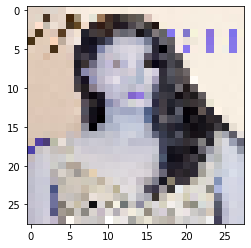

In [111]:
import numpy as np


for k in file_list:  # 리스트 안에 있는 파일들을 하나씩 빼내는 코드
    img = cv2.imread(path + '\\' + k)   # 수지 사진을 숫자행렬로 변경합니다.
                                        #
    width, height = img.shape[:2]  # 수지 사진 숫자 행렬에서 가로, 세로 가져온다.
    resize_img = cv2.resize(img, (28 , 28), interpolation=cv2.INTER_CUBIC)
    cv2.imwrite('c:\\data\\data11\\resize\\' + k, resize_img)   # resize 한 이미지를 저장합니다.
    
plt.imshow(resize_img)  # resize 한 수지 사진을 시각화 해라 ~
plt.show()    

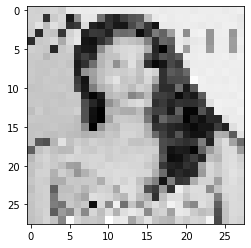

In [112]:
j= 'c:\\data\\data11\\resize\\b.jpg'
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

img = mpimg.imread(j)
gray = rgb2gray(img)
plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.show()

In [113]:
gray.shape

(28, 28)

In [114]:
x = gray.flatten()
x.shape

(784,)

In [137]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉토리의 파일들을 가져올 수 있도록 설정
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient  import numerical_gradient

class simpleNet:
    def __init__(self):   # 설계도(클래스)로 제품(객체)를 만들때 바로 실행되는 함수
        self.W = np.random.randn(784,3)   # 랜덤으로 가중치 행렬을 생성
        
    def predict(self, x):   # 예측하는 함수
        return np.dot(x, self.W) 
    
    def loss(self, x, t):
        z = self.predict(x)  # 입력값을 넣어서 z 값을 출력
        y = softmax(z)  # z 값 받아서 확률벡터를 출력
        loss = cross_entropy_error(y,t) # 확률벡터와 정답을 넣어서 오차를 출력
        return y, loss

t = np.array([0,0,1])
net = simpleNet()
p = net.predict(x)
y, loss = net.loss(x, t)

print(np.argmax(p))  # 최대값의 인덱스
print(y)             # 확률벡터
print(loss)          # 오차
print(loss.round())  

2
[0. 0. 1.]
-9.999999505838704e-08
-0.0
